In [16]:
import numpy as np
import matplotlib.pyplot as plt

#**Funções**

## *Matriz triangular superior*

In [17]:
def solve_Upper_triang_matrix(A, B):
    n = len(A)
    X = np.zeros((n, 1), dtype=float)

    for i in range(n - 1, -1, -1):
        dot_product = 0.0
        for j in range(i + 1, n):
            dot_product += A[i, j] * X[j]
        X[i] = (B[i] - dot_product) / A[i, i]

    return X

## *Matriz triangular inferior*

In [18]:
def solve_Lower_triang_matrix(A, B):
    n = len(A)
    X = np.zeros((n, 1), dtype=float)

    for i in range(n):
        dot_product = 0.0
        for j in range(i):
            dot_product += A[i, j] * X[j]
        X[i] = (B[i] - dot_product) / A[i, i]

    return X

## *Eliminação Gaussiana*

In [19]:
def eliminacao_gauss(A, B):
    A_copia = np.copy(A)
    B_copia = np.copy(B)

    for i in range(len(A_copia) - 1):
        pivo = A_copia[i, i]

        for j in range(i + 1, len(A_copia)):
            m = -A_copia[j, i] / pivo
            A_copia[j, :] += A_copia[i, :] * m
            B_copia[j] += B_copia[i] * m

    return A_copia, B_copia

## *Pivoteamento parcial*





In [20]:
def eliminacao_gauss_pivot(A, B):
    A_copia = np.copy(A)
    B_copia = np.copy(B)

    for i in range(len(A_copia) - 1):
        pivo = A_copia[i, i]

        z = i + 1
        find = False
        line = i

######################################################## inicio troca das linhas
        while z < len(A_copia):
            if abs(A_copia[z, i]) > abs(pivo):
                pivo = A_copia[z, i]
                line = z
                find = True
            z += 1

        if find:
            Aux = np.copy(A_copia)
            A_copia[i,:] = np.copy(A_copia[line,:])
            A_copia[line,:] = np.copy(Aux[i,:])
            Aux = np.copy(B_copia)
            B_copia[i] = B_copia[line]
            B_copia[line] = Aux[i]
######################################################### final troca das linhas

        for j in range(i + 1, len(A_copia)):
            m = -A_copia[j, i] / pivo
            A_copia[j, :] += A_copia[i, :] * m
            B_copia[j] += B_copia[i] * m

    return A_copia, B_copia

## *Checagem do pivo*


In [22]:
def check_null_pivot(A, B):
    A_copia = np.copy(A)
    B_copia = np.copy(B)

    for i in range(len(A_copia) - 1):
        pivo = A_copia[i, i]

        if pivo == 0:
            z = i+1
            find = False
            line = i

            while z < len(A_copia):
                if abs(A_copia[z, i]) > abs(pivo):
                    pivo = A_copia[z, i]
                    line = z
                    find = True
                z += 1

            if find:
                Aux = np.copy(A_copia)
                A_copia[i,:] = np.copy(A_copia[line,:])
                A_copia[line,:] = np.copy(Aux[i,:])
                Aux = np.copy(B_copia)
                B_copia[i] = B_copia[line]
                B_copia[line] = Aux[i]

    return A_copia, B_copia

## *Eliminacao Gauss Jordan*




In [23]:
def eliminacao_gauss_jordan(A, B):
    A_copia = np.copy(A)
    B_copia = np.copy(B)

    for i in range(len(A_copia)):
        pivo = A_copia[i, i]
        A_copia[i,:] /= pivo
        B_copia[i] /= pivo

        for j in range(0, len(A_copia)):
            if j != i:
                m = -A_copia[j, i]
                A_copia[j, :] += A_copia[i, :] * m
                B_copia[j] += B_copia[i] * m

    return A_copia, B_copia

## *Inversa via Gauss Jordan*

In [24]:
def inversa_gauss_jordan(A):
    A_copia = np.copy(A)
    B_copia = np.eye(len(A))

    for i in range(len(A_copia)):
        pivo = A_copia[i, i]
        A_copia[i,:] /= pivo
        B_copia[i] /= pivo

        for j in range(0, len(A_copia)):
            if j != i:
                m = -A_copia[j, i]
                A_copia[j, :] += A_copia[i, :] * m
                B_copia[j, :] += B_copia[i, :] * m

    return B_copia

## Decomposição LU

In [25]:
def LU_decomposition(A):
    n = A.shape[0]
    U, L = A.copy(), np.eye(n)

    for i in range(n):
        for j in range(i+1, n):
            coef = -U[j, i] / U[i, i]
            L[j, i] = -coef
            U[j] += U[i] * coef

    return L, U

## Solução do sistema LU

In [26]:
def LU_solution(L, U, B):
    Y = solve_Lower_triang_matrix(L,B)
    X = solve_Upper_triang_matrix(U,Y)

    return X

##Cálculo do determinante

In [27]:
def det(M):
    if M.shape[0] != M.shape[1]:
        raise ValueError("A matriz não é quadrada.")

    n = M.shape[0]

    if n == 2:
        return M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]

    determinante = 0
    for j in range(n):
        cofactor = ((-1) ** j) * M[0, j] * det(M[1:, np.arange(n) != j])
        determinante += cofactor

    return determinante

## Regra de Cramer

In [28]:
def cramer(M, B):
    n = len(B)
    x = np.zeros((n, 1))
    D = det(M)

    for i in range(n):
        A = M.copy()
        A[:, i] = B[:, 0]
        x[i] = det(A) / D

    return x

##Critério de Sassenfeld

In [50]:
def sassenfeld_criteria(A):
    n = len(A)
    B = np.ones(n)

    for j in range(n):
        sum_abs_products = 0

        for i in range(n):
            if i != j:
                sum_abs_products += abs(A[j, i]) * B[i]

        B[j] = sum_abs_products / abs(A[j, j])

    return np.max(B)

## Gauss - Seidel

In [51]:
def gauss_seidel(coeff_matrix, constants, max_iterations=100, tolerance=1e-8):
    A = coeff_matrix.copy()
    B = constants.copy()

    n = len(coeff_matrix)

    X = [np.zeros((n, 1))]

    def relative_difference(x_new, x):
        return np.max(np.abs(x_new - x)) / np.max(np.abs(x_new))

    for i in range(n):
        A[i] = -coeff_matrix[i] / coeff_matrix[i, i]
        A[i, i] = 0
        B[i] = constants[i] / coeff_matrix[i, i]

    for _ in range(max_iterations):
        x = X[-1].copy()
        for i in range(n):
            x[i] = A[i] @ x + B[i]
        X.append(x)

        if relative_difference(X[-1], X[-2]) < tolerance:
            break

    return X[-1]

# 1) Dadas as equações abaixo:

$$10x_1 + 2x_2 - x_3 = 27$$

$$-3x_1 - 6x_2 + 2x_3 = -61,5$$

$$x_1 + x_2 + 5x_3 = -21,5$$

In [ ]:
A1 = np.array([
    [10, 2, -1],
    [-3, -6, 2],
    [1, 1, 5]
], dtype='float')

B1 = np.array([
    [27],
    [-61.5],
    [-21.5]
], dtype='float')

## (a) Resolva por eliminação de Gauss

In [ ]:
[Ac1, Bc1] = eliminacao_gauss(A1, B1)
x1 = solve_Upper_triang_matrix(Ac1, Bc1)

sol1a = x1.reshape(-1, 1)
sol1a

array([[ 0.5],
       [ 8. ],
       [-6. ]])

## (b) Aplique a decomposição LU para encontrar a solução.

In [ ]:
L1, U1 = LU_decomposition(A1)

sol1b = LU_solution(L1, U1, B1)
sol1b

array([[ 0.5],
       [ 8. ],
       [-6. ]])

# 2) Considere o sistema linear:

$$
\begin{bmatrix}
1 & 2 & 1 \\
2 & 3 & 1 \\
3 & 5 & 2 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
=
\begin{bmatrix}
3 \\
5 \\
1 \\
\end{bmatrix}
$$

Verifique, usando eliminação Gaussiana, que este sistema não tem solução. Qual será o comportamento do método de Gauss-Seidel ?

In [ ]:
A2 = np.array([
    [1, 2, 1],
    [2, 3, 1],
    [3, 5, 2]
], dtype='float')

B2 = np.array([
    [3],
    [5],
    [1]
], dtype='float')

[Ac2, Bc2] = eliminacao_gauss(A2, B2)
x2 = solve_Upper_triang_matrix(Ac2, Bc2)

sol2 = x2.reshape(-1, 1)
sol2

<ipython-input-58-8260c1ba306d>:9: RuntimeWarning: divide by zero encountered in divide
  X[i] = (B[i] - dot_product) / A[i, i]
<ipython-input-58-8260c1ba306d>:8: RuntimeWarning: invalid value encountered in add
  dot_product += A[i, j] * X[j]


array([[ nan],
       [ inf],
       [-inf]])

# 3) Use eliminação de Gauss para resolver:

$$8x_1 + 2x_2 - 2x_3 = -2$$

$$10x_1 + 2x_2 + 4x_3 = 4$$

$$12x_1 + 2x_2 + 2x_3 = 6$$

In [ ]:
A3 = np.array([
    [8, 2, -2],
    [10, 2, 4],
    [12, 2, 2]
], dtype='float')

B3 = np.array([
    [-2],
    [ 4],
    [ 6]
], dtype='float')

[Ac3, Bc3] = eliminacao_gauss(A3, B3)
x3 = solve_Upper_triang_matrix(Ac3, Bc3)

sol3 = x3.reshape(-1, 1)
sol3

array([[ 1.5],
       [-6.5],
       [ 0.5]])

# 4) Dado o sistema de equações abaixo:

$$-3x_2 + 7x_3 = 2$$

$$x_1 + 2x_2 - x_3 = 3$$

$$5x_1 - 2x_2 = 2$$

In [ ]:
A4 = np.array([
    [0, -3, 7],
    [1, 2, -1],
    [5, -2, 0]
], dtype='float')

B4 = np.array([
    [2],
    [3],
    [2]
], dtype='float')

## a) Calcule o determinante;

In [ ]:
detA4 = det(A4)
detA4

-69.0

## b) Use a regra de Cramer para determinar os $x_i$;

In [ ]:
sol4b = cramer(A4, B4)
sol4b

array([[0.98550725],
       [1.46376812],
       [0.91304348]])

## c) Use eliminação de Gauss com pivotamento parcial para determinar os $x_i$;

In [ ]:
[Ac4, Bc4] = eliminacao_gauss_pivot(A4, B4)
x4 = solve_Upper_triang_matrix(Ac4, Bc4)

sol4c = x4.reshape(-1, 1)
sol4c

array([[0.98550725],
       [1.46376812],
       [0.91304348]])

## d) Substitua seus dados nas equações originais para verificar a resposta.

In [ ]:
res_b = A4@sol4b - B4
print(res_b)

res_c = A4@sol4c - B4
print(res_c)

[[-4.4408921e-16]
 [ 0.0000000e+00]
 [ 0.0000000e+00]]
[[-4.4408921e-16]
 [ 4.4408921e-16]
 [ 0.0000000e+00]]


# 5) Use eliminação de Gauss-Jordan para resolver os seguintes sistemas:

##(a)
$$ 2x_1 - 6x_2 - x_3 = -38$$
$$-3x_1 - x_2 + 7x_3 = -34$$
$$-8x_1 + x_2 - 2x_3 = -20$$

In [ ]:
A5a = np.array([
    [2, -6, -1],
    [-3, -1, 7],
    [-8, 1, -2]
], dtype='float')

B5a = np.array([
    [-38],
    [-34],
    [-20]
], dtype='float')

[Ac5a, Bc5a] = check_null_pivot(A5a, B5a)

[Aj5a, Bj5a] = eliminacao_gauss_jordan(Ac5a, Bc5a)

Bj5a

array([[ 4.],
       [ 8.],
       [-2.]])

##(b)

$$ 2x_1 + x_2 - x_3 = 1$$
$$5x_1 + 2x_2 + 2x_3 = 4$$
$$3x_1 + x_2 + x_3 = 5$$

In [ ]:
A5b = np.array([
    [2, 1, -1],
    [5, 2, 2],
    [3, 1, 1]
], dtype='float')

B5b = np.array([
    [1],
    [4],
    [5]
], dtype='float')

[Ac5b, Bc5b] = check_null_pivot(A5b, B5b)

[Aj5b, Bj5b] = eliminacao_gauss_jordan(Ac5b, Bc5b)

Bj5b

array([[  6.],
       [-12.],
       [ -1.]])

# 6) Suponha que um time de 3 paraquedistas está ligado por uma corda sem peso enquanto cai, em queda livre, a uma velocidade de 5 m/s. Calcule a tensão em cada seção da corda e a aceleração do time, dado o seguinte:
$$
\begin{array}{|c|c|c|}
\hline
\text{Paraquedista} & \text{Massa (kg)} & \text{Coeficiente de Arrasto}\\
\hline
1 & 70 & 10 \\
2 & 60 & 14 \\
3 & 40 & 17 \\
\hline
\end{array}
$$

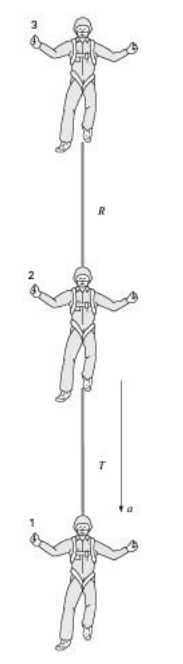

## Sistema de equações

\begin{cases}
\begin{aligned}
m_1a + T = m_1g - c_1v\\
m_2a - T + R = m_2g - c_2v\\
m_3a - R = m_3g - c_3v
\end{aligned}
\end{cases}

## Forma Matricial

$$
\begin{bmatrix}
m_1 & 1 & 0 \\
m_2 & -1 & 1 \\
m_3 & 0 & -1 \\
\end{bmatrix}
\begin{bmatrix}
a \\
T \\
R \\
\end{bmatrix}
=
\begin{bmatrix}
m_1g - c_1v \\
m_2g - c_2v \\
m_3g - c_3v \\
\end{bmatrix}
$$

In [ ]:
g = 9.81

v = 5

m1 = 70
m2 = 60
m3 = 40

c1 = 10
c2 = 14
c3 = 17

A6 = np.array([
    [m1, 1, 0],
    [m2, -1, 1],
    [m3, 0, -1]
], dtype='float')

B6 = np.array([
    [m1*g - c1*v],
    [m2*g - c2*v],
    [m3*g - c3*v]
], dtype='float')

[Ac6, Bc6] = eliminacao_gauss(A6, B6)
x6 = solve_Upper_triang_matrix(Ac6, Bc6)

sol6 = x6.reshape(-1, 1)
sol6

array([[ 8.60411765],
       [34.41176471],
       [36.76470588]])

# 7) Resolva o seguinte esquema de equações por decomposição LU:

$$8x_1 + 4x_2 - x_3 = 11$$

$$-2x_1 + 5x_2 + x_3 = 4$$

$$2x_1 - x_2 + 6x_3 = 7$$

Determine também a matriz inversa. Verifique seus resultados comprovando que
$[A].[A]^{-1}= I$

In [ ]:
A7 = np.array([
    [8, 4, -1],
    [-2, 5, 1],
    [2, -1, 6]
], dtype='float')

B7 = np.array([
    [11],
    [4],
    [7]
], dtype='float')

In [ ]:
L7, U7 = LU_decomposition(A7)

sol7 = LU_solution(L7, U7, B7)
sol7

array([[1.],
       [1.],
       [1.]])

In [ ]:
eye = A7 @ inversa_gauss_jordan(A7)
eye

array([[ 1.00000000e+00,  4.16333634e-17,  0.00000000e+00],
       [-1.73472348e-17,  1.00000000e+00,  0.00000000e+00],
       [-6.93889390e-18,  2.77555756e-17,  1.00000000e+00]])

# 8) O seguinte sistema de equações é projetado para determinar as concentrações (os c´s em g/m3) em uma série de reatores acoplados como função da quantidade de entrada de massa em cada reator (o lado direito está em g/dia),

$$15c_1 - 3c_2 - c_3 = 3800$$

$$-3c_1 + 18c_2 - 6c_3 = 1200$$

$$-4c_1 - c_2 + 12c_3 = 2350$$

In [ ]:
A8 = np.array([
    [15, -3, -1],
    [-3, 18, -6],
    [-4, -1, 12]
], dtype='float')

B8 = np.array([
    [3800],
    [1200],
    [2350]
], dtype='float')

## (a) Determine a matriz inversa.

In [ ]:
inv8 = inversa_gauss_jordan(A8)
inv8

array([[0.07253886, 0.01278066, 0.01243523],
       [0.02072539, 0.06079447, 0.03212435],
       [0.02590674, 0.00932642, 0.09015544]])

## (b) Use a inversa para determinar a solução.

In [ ]:
sol8 = inv8 @ B8
sol8

array([[320.20725389],
       [227.20207254],
       [321.50259067]])

## (c) Determine de quanto o fluxo de entrada de massa no reator 3 deve ser aumentado para induzir um aumento de 10g/m³ na concentração do reator 1.

In [ ]:
sol8c = sol8.copy()

sol8c[0] += 10

A8 @ sol8c

array([[3950.],
       [1170.],
       [2310.]])

In [ ]:
dc = np.array([
    [10],
    [0],
    [0]
], dtype='float')

increase = inv8 @ dc
increase

array([[0.7253886 ],
       [0.20725389],
       [0.25906736]])

## (d) De quanto a concentração no reator 3 será reduzida se o fluxo de entrada de massa nos reatores 1 e 2 for reduzido para 500 e 250 g/dia, respectivamente?

In [ ]:
B8d = np.array([
    [3300],
    [950],
    [2350]
    ], dtype='float')

sol8d = inv8 @ B8d
sol8d

array([[280.74265976],
       [201.64075993],
       [306.21761658]])

In [ ]:
dd = np.array([
    [-500],
    [-250],
    [0]
    ], dtype='float')

decrease = inv8 @ dd
decrease

array([[-39.46459413],
       [-25.56131261],
       [-15.28497409]])

# 9) Em cada caso abaixo:

a. Verifique se o critério de Sassenfeld é satisfeito;

b. Resolva por Gauss-Seidel, se possível:

## 1º caso:

$$
A =
\begin{bmatrix}
10 & 1 & 1 \\
1 & 10 & 1 \\
1 & 1 & 10 \\
\end{bmatrix} ;
B =
\begin{bmatrix}
12 \\
12 \\
12 \\
\end{bmatrix}
$$

In [32]:
A9a = np.array([
    [10, 1, 1],
    [1, 10, 1],
    [1, 1, 10]
], dtype='float')

B9a = np.array([
    [12],
    [12],
    [12]
], dtype='float')

In [49]:
sassenfeld_criteria(A9a)

0.2

In [45]:
gauss_seidel(A9a, B9a)

array([[1.],
       [1.],
       [1.]])

## 2º caso:
$$
A =
\begin{bmatrix}
4 & -1 & 0 & 0 \\
-1 & 4 & -1 & 0 \\
0 & -1 & 4 & -1 \\
0 & 0 & -1 & 4 \\
\end{bmatrix} ;
B =
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$

In [36]:
A9b = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 4]
], dtype='float')

B9b = np.array([
    [1],
    [1],
    [1],
    [1]
], dtype='float')

In [48]:
sassenfeld_criteria(A9b)

0.328125

In [46]:
gauss_seidel(A9b, B9b)

array([[0.36363636],
       [0.45454545],
       [0.45454545],
       [0.36363636]])